In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#to display plots inline
%matplotlib inline

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the feature-engineered dataset
feature_engineered_data_path = '/content/gdrive/My Drive/Colab Notebooks/Sales Trends Analysis Project/feature_engineered_dataset.csv'
df_cleaned = pd.read_csv(feature_engineered_data_path)

# Display the first few rows to verify
df_cleaned.head()


,Invoice_Id,StockCode,Description,Quantity,Invoice_date,Price,Customer_Id,Country,Year,Month,Day,DayOfWeek,Hour,Weekday,Quarter,Total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,2,8,Wednesday,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8,Wednesday,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,2,8,Wednesday,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8,Wednesday,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,2,8,Wednesday,4,20.34


In [ ]:
# Summary statistics for numerical features
df_cleaned.describe()


,Invoice_Id,Quantity,Price,Customer_Id,Year,Month,Day,DayOfWeek,Hour,Quarter,Total_Sales
count,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000
mean,560615.564551,9.856887,2.699428,15297.678677,2010.934581,7.608894,15.046404,2.613224,12.729773,2.854929,17.616807
std,13093.509940,14.009346,2.466849,1709.355295,0.247265,3.414529,8.655023,1.929133,2.271085,1.121126,29.063297
min,536365.000000,1.000000,0.001000,12347.000000,2010.000000,1.000000,1.000000,0.000000,6.000000,1.000000,0.001000
25%,549241.000000,2.000000,1.250000,13969.500000,2011.000000,5.000000,7.000000,1.000000,11.000000,2.000000,4.680000
50%,561889.000000,6.000000,1.950000,15159.000000,2011.000000,8.000000,15.000000,2.000000,13.000000,3.000000,11.600000
75%,572074.000000,12.000000,3.750000,16795.000000,2011.000000,11.000000,22.000000,4.000000,14.000000,4.000000,18.750000
max,581587.000000,117.000000,14.550000,18287.000000,2011.000000,12.000000,31.000000,6.000000,20.000000,4.000000,1226.400000


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383418 entries, 0 to 383417
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Invoice_Id    383418 non-null  int64  
 1   StockCode     383418 non-null  object 
 2   Description   383418 non-null  object 
 3   Quantity      383418 non-null  int64  
 4   Invoice_date  383418 non-null  object 
 5   Price         383418 non-null  float64
 6   Customer_Id   383418 non-null  float64
 7   Country       383418 non-null  object 
 8   Year          383418 non-null  int64  
 9   Month         383418 non-null  int64  
 10  Day           383418 non-null  int64  
 11  DayOfWeek     383418 non-null  int64  
 12  Hour          383418 non-null  int64  
 13  Weekday       383418 non-null  object 
 14  Quarter       383418 non-null  int64  
 15  Total_Sales   383418 non-null  float64
dtypes: float64(3), int64(8), object(5)
memory usage: 46.8+ MB


# Sales Overview

In [ ]:
# Calculating Total Sales by Month, Quarter, and Year

# Total sales by month
sales_by_month = df_cleaned.groupby(['Year', 'Month'])['Total_Sales'].sum().reset_index()


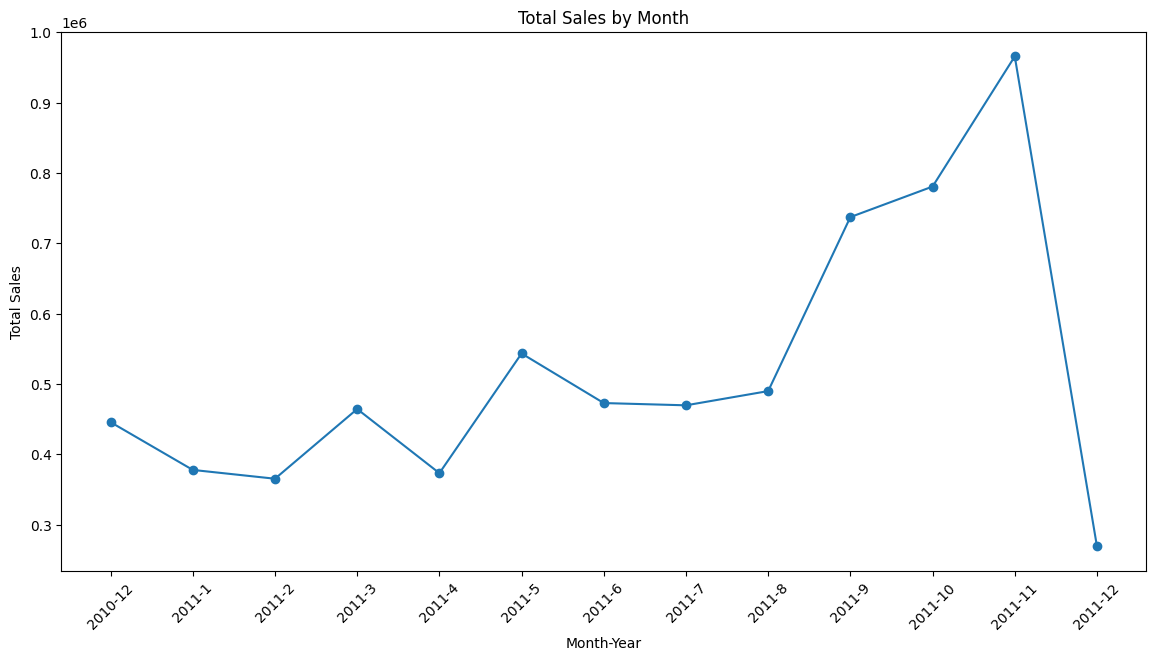

In [ ]:
import matplotlib.pyplot as plt

# Sales trends by month
plt.figure(figsize=(14, 7))
plt.plot(sales_by_month['Year'].astype(str) + '-' + sales_by_month['Month'].astype(str), sales_by_month['Total_Sales'], marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Key Findings:

Sales Growth: Sales generally increase throughout 2011, showing positive momentum for the business.

**Seasonal Trends:**

- December 2010 - January 2011: Sales drop after December, likely due to the end of the holiday season.
March - May 2011: Sales dip in April but recover in May.

- August - November 2011: Significant sales growth, peaking in November, likely due to holiday shopping.

- November Peak: Sales hit their highest point in November 2011, probably due to events like Black Friday.

- December Drop: There’s a steep decline in sales in December 2011, due to we have limited data from 2010 t0 2011 only.


In [ ]:
# Total sales by quarter
sales_by_quarter = df_cleaned.groupby(['Year', 'Quarter'])['Total_Sales'].sum().reset_index()

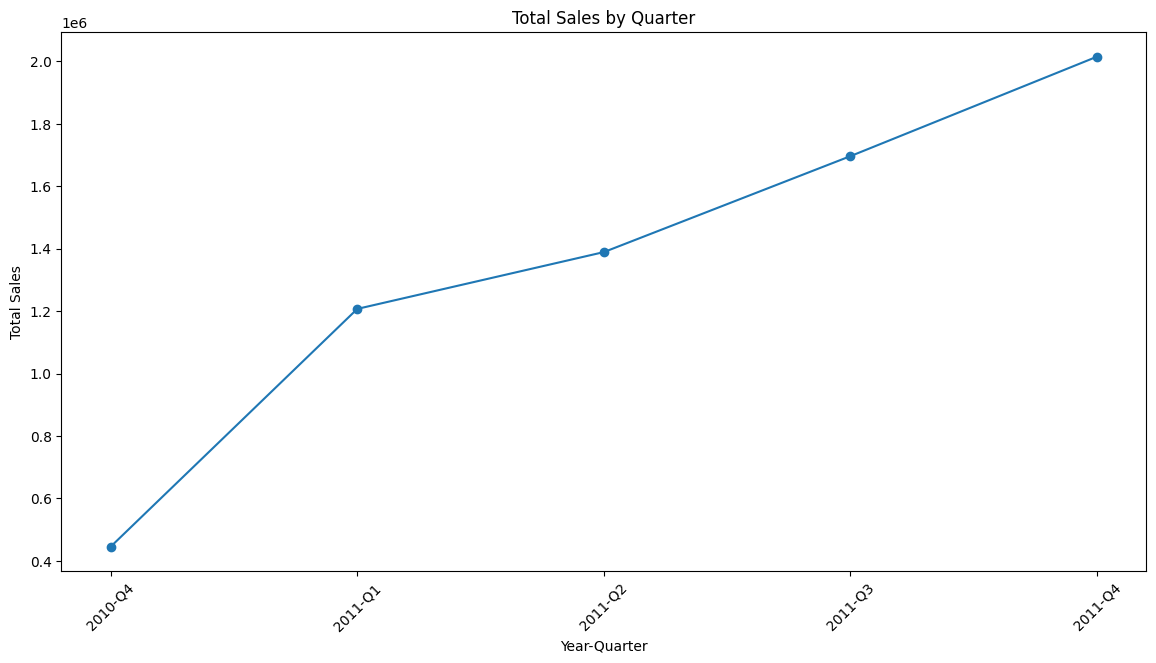

In [ ]:
# Sales trends by quarter
plt.figure(figsize=(14, 7))
plt.plot(sales_by_quarter['Year'].astype(str) + '-Q' + sales_by_quarter['Quarter'].astype(str), sales_by_quarter['Total_Sales'], marker='o')
plt.title('Total Sales by Quarter')
plt.xlabel('Year-Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

**Key Findings:**

Consistent Growth: The sales show a steady and consistent increase across each quarter from Q4 2010 to Q4 2011. This reflects a strong overall growth trend for the business during this period.

Quarterly Performance:

- Q4 2010 to Q1 2011: There is a significant jump in sales from Q4 2010 to Q1 2011, indicating strong momentum as the business enters the new year.

- Q2 2011 to Q4 2011: Sales continue to grow steadily each quarter, with Q4 2011 showing the highest sales, likely driven by holiday shopping and end-of-year promotions.

- Peak in Q4 2011: The highest sales are recorded in Q4 2011, consistent with retail trends where sales peak during the holiday season.

In [ ]:
# Total sales by year
sales_by_year = df_cleaned.groupby('Year')['Total_Sales'].sum().reset_index()

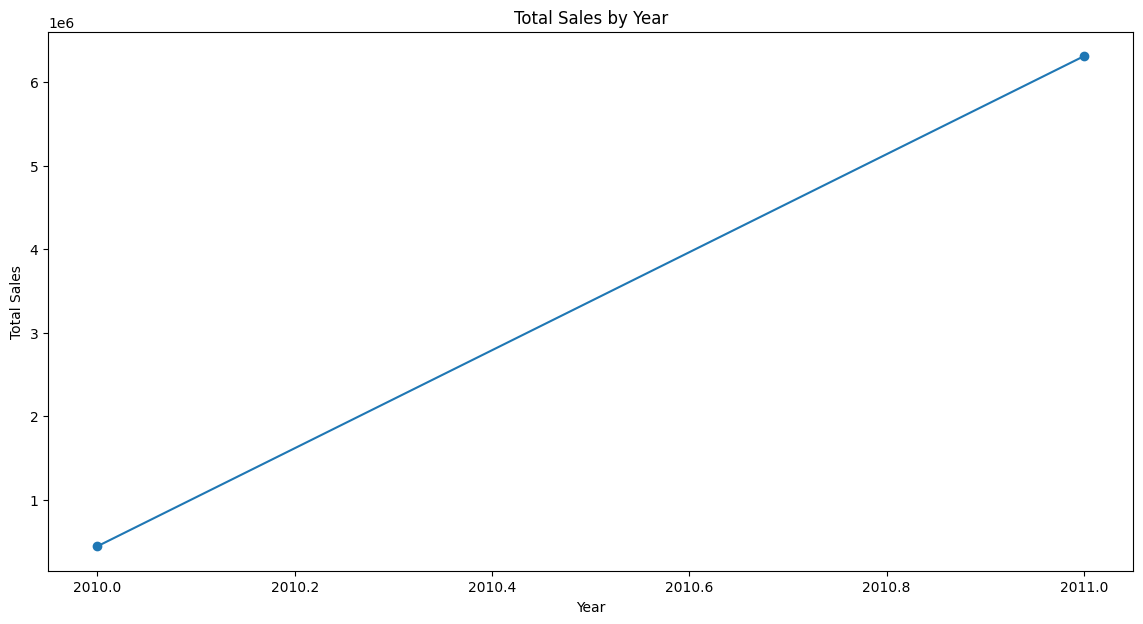

In [ ]:
# Sales trends by year
plt.figure(figsize=(14, 7))
plt.plot(sales_by_year['Year'], sales_by_year['Total_Sales'], marker='o')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

**Key Findings:**

- Strong Annual Growth: The sales show a clear and strong upward trend from 2010 to 2011, indicating robust growth in total sales over the year.

- Year-over-Year Comparison: The linear increase suggests that sales in 2011 significantly outperformed 2010, with consistent growth throughout the year.

# **Peak Sales Periods**

**Identify Peak Sales Periods**

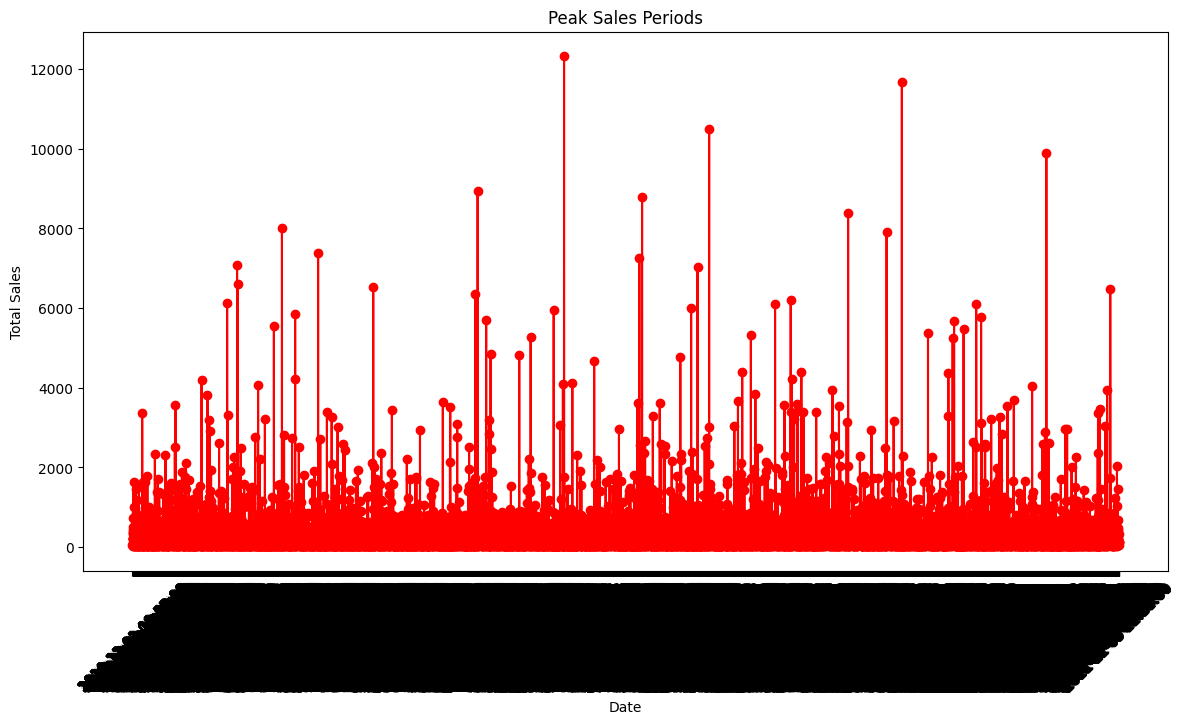

In [ ]:
# Calculate overall average sales
average_sales = df_cleaned['Total_Sales'].mean()

# Define peaks as sales that exceed 20% above the average
peak_threshold = average_sales * 1.2

# Identify peak periods
df_cleaned['Is_Peak'] = df_cleaned['Total_Sales'] > peak_threshold

# Group by date to find peak sales periods
peak_sales_periods = df_cleaned[df_cleaned['Is_Peak']].groupby('Invoice_date')['Total_Sales'].sum().reset_index()

# Visualize peak sales periods
plt.figure(figsize=(14, 7))
plt.plot(peak_sales_periods['Invoice_date'], peak_sales_periods['Total_Sales'], marker='o', linestyle='-', color='red')
plt.title('Peak Sales Periods')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


**Key Findings:**

- The plot shows significant variability in daily sales, with numerous spikes indicating peak sales periods. This suggests that certain days see much higher revenue in GBP compared to others.

- There are frequent peaks throughout the time period, with some days reaching very high revenue amounts (over £10,000). These peaks are likely driven by special promotions, holidays, or other events that increase consumer spending.

- As the plot progresses, the frequency and magnitude of these peaks seem to increase, aligning with the overall trend of growing sales throughout 2011.

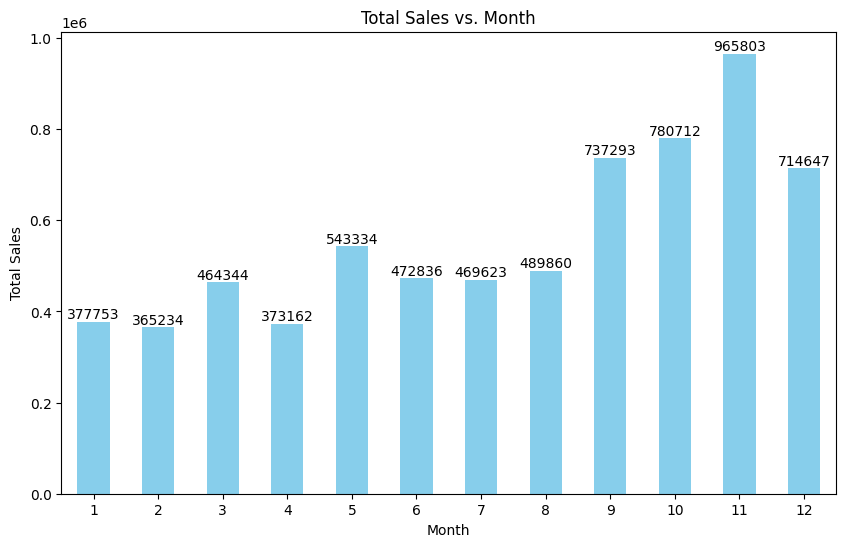

In [ ]:
# Total Sales vs. Month
sales_by_month = df_cleaned.groupby('Month')['Total_Sales'].sum()
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar', color='skyblue')
plt.title('Total Sales vs. Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
for i, v in enumerate(sales_by_month):
    plt.text(i, v + 0.05, f"{v:.0f}", ha='center', va='bottom')
plt.show()

**Key Findings:**

- Seasonal Sales Trends: The total sales in GBP show a clear seasonal pattern, with sales gradually increasing from August, peaking in November, and slightly decreasing in December.

- Peak Month: November has the highest total sales, reaching approximately £965,803, which aligns with major shopping events like Black Friday, indicating a significant boost in consumer spending during this month.

- Slow Start to the Year: The first few months of the year (January to April) have the lowest sales, with January having the lowest total sales at £377,753. This is likely due to post-holiday spending fatigue, where consumers reduce spending after the festive period.

- Growth from Mid-Year: Starting in May, there is a steady increase in sales, suggesting that the mid-year period marks the beginning of an upward trend in consumer spending, leading into the holiday season.

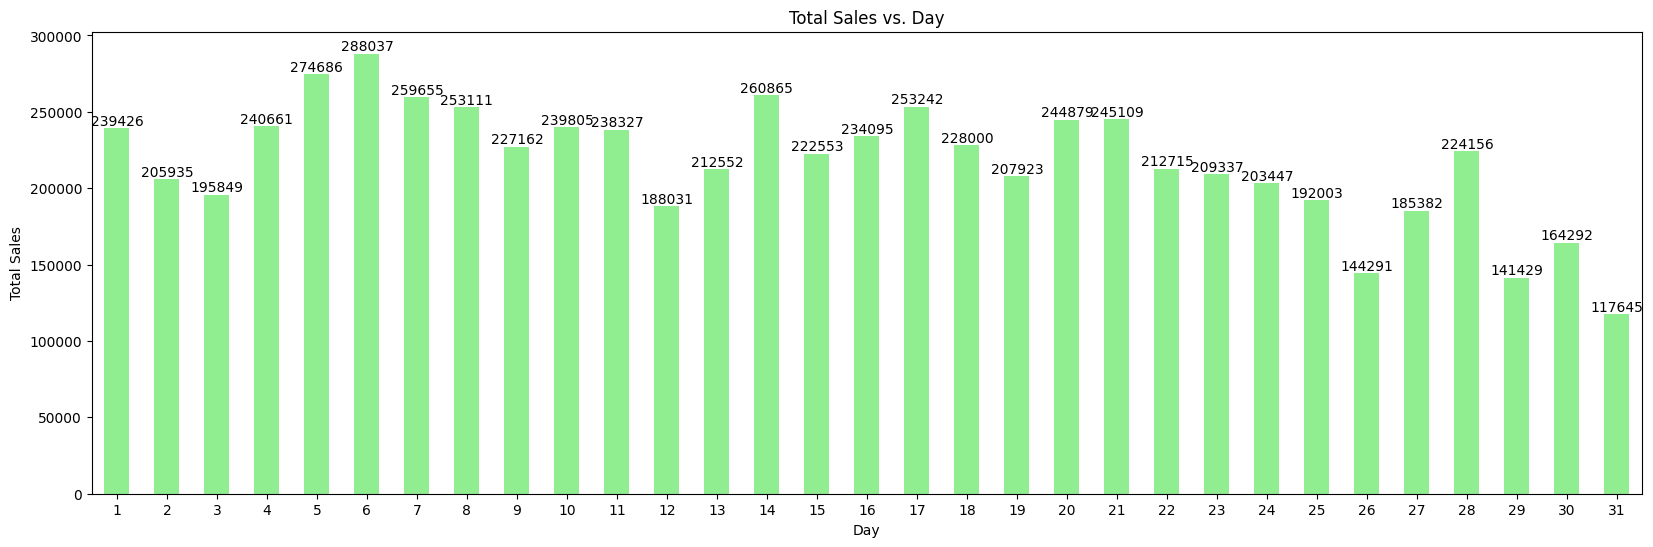

In [ ]:
# Total Sales vs. Day
sales_by_day = df_cleaned.groupby('Day')['Total_Sales'].sum()
plt.figure(figsize=(20, 6))
sales_by_day.plot(kind='bar', color='lightgreen')
plt.title('Total Sales vs. Day')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
for i, v in enumerate(sales_by_day):
    plt.text(i, v + 0.05, f"{v:.0f}", ha='center', va='bottom')
plt.show()

**Key Findings:**

- Sales Distribution Across the Month: The total sales in GBP vary across the days of the month, with some days consistently showing higher sales than others.

- Peak Sales Days: The highest sales occur on the 6th day of the month, reaching approximately £288,037. Other high-performing days include the 14th and 5th, with sales around £260,865 and £274,686, respectively.

- Mid-Month Drop: There is a noticeable drop in sales around the 12th to 13th of the month, with sales dipping to the lowest point of £188,031 on the 12th.

- End-of-Month Decline: Sales tend to decline towards the end of the month, particularly from the 25th onwards, with the lowest sales recorded on the 31st at £117,645.

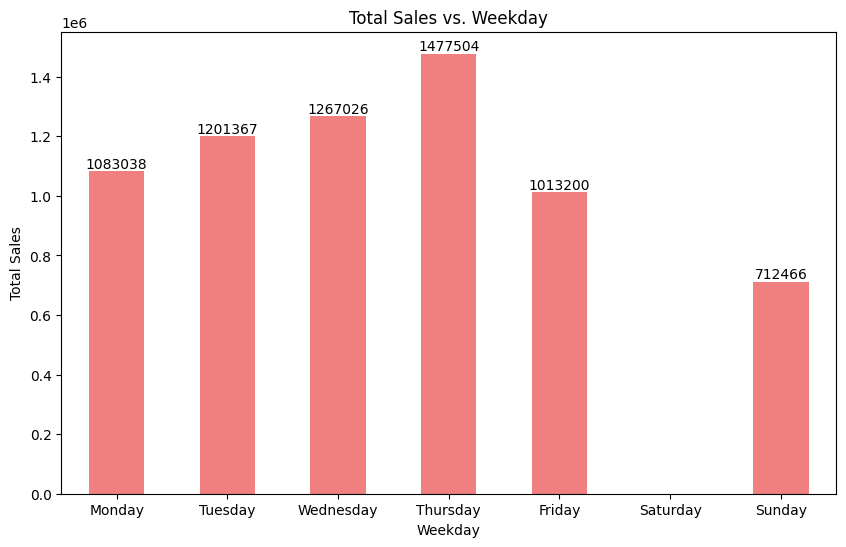

In [ ]:
# Total Sales vs. Weekday
sales_by_weekday = df_cleaned.groupby('Weekday')['Total_Sales'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
sales_by_weekday.plot(kind='bar', color='lightcoral')
plt.title('Total Sales vs. Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
for i, v in enumerate(sales_by_weekday):
    plt.text(i, v + 0.05, f"{v:.0f}", ha='center', va='bottom')
plt.show()


**Key Findings:**

- Highest Sales Day: Thursday is the top-performing day of the week, with total sales reaching approximately £1,477,504. This suggests that consumers are most active towards the end of the workweek.

- Mid-Week Strength: Wednesday and Tuesday also show strong sales, with total sales of around £1,267,026 and £1,201,367, respectively. This indicates consistent consumer activity in the middle of the week.

- Weekend Drop: Sales drop significantly on the weekend, with Sunday showing the lowest sales at £712,466, followed by Saturday (not shown in the data but inferred as lower than Friday).

- Friday Sales: While still relatively strong, Friday sees a decrease in sales compared to the mid-week peak, with total sales of £1,013,200.

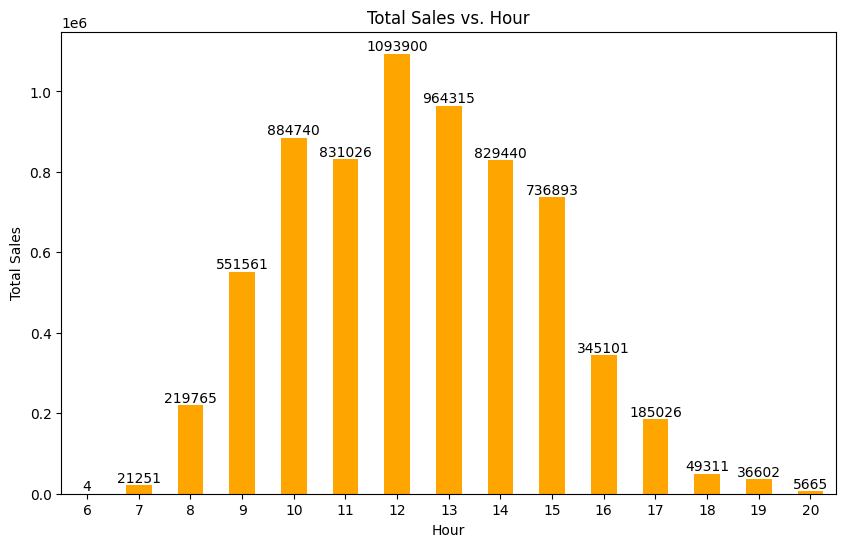

In [ ]:
# Total Sales vs. Hour
sales_by_hour = df_cleaned.groupby('Hour')['Total_Sales'].sum()
plt.figure(figsize=(10, 6))
sales_by_hour.plot(kind='bar', color='orange')
plt.title('Total Sales vs. Hour')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
for i, v in enumerate(sales_by_hour):
    plt.text(i, v + 0.05, f"{v:.0f}", ha='center', va='bottom')
plt.show()


**Key Findings:**

- Peak Sales at Noon (12:00 PM): The highest sales are recorded at 12:00 PM, with total sales amounting to approximately £1,093,900. This indicates that noon is the most active time for purchases, likely when consumers are on lunch breaks or have a moment to shop.

**Morning Sales Build-Up:**

- Sales start to increase noticeably at 8:00 AM, with a significant jump to £551,561 by 9:00 AM.

- This upward trend continues, reaching £884,740 at 10:00 AM and £831,026 by 11:00 AM, just before the peak at noon. This suggests that consumer activity builds steadily throughout the morning, peaking at midday.

**Post-Peak Decline:**

- After the noon peak, sales begin to decline gradually but remain relatively strong at £964,315 at 1:00 PM and £829,440 at 2:00 PM.

- By 4:00 PM, sales have dropped to £345,101, indicating a clear tapering off of consumer activity in the afternoon.

**Evening Sales Drop:**

- Sales decline sharply after 5:00 PM, with £185,026 at 5:00 PM and dropping to £49,311 by 6:00 PM.

- By 8:00 PM, sales are minimal, at just £5,665, indicating very low purchasing activity in the evening.

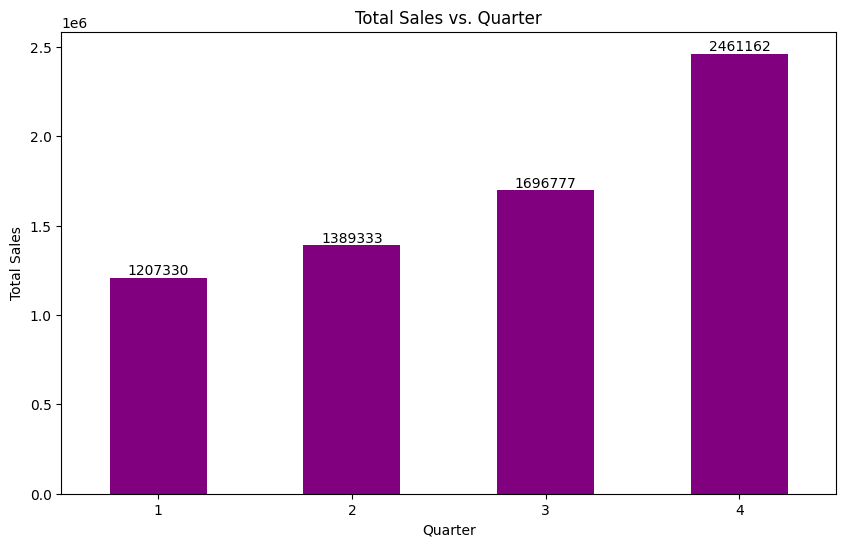

In [ ]:
# Total Sales vs. Quarter
sales_by_quarter = df_cleaned.groupby('Quarter')['Total_Sales'].sum()
plt.figure(figsize=(10, 6))
sales_by_quarter.plot(kind='bar', color='purple')
plt.title('Total Sales vs. Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
for i, v in enumerate(sales_by_quarter):
    plt.text(i, v + 0.05, f"{v:.0f}", ha='center', va='bottom')
plt.show()

**Progressive Sales Growth:**

- Sales increase steadily across each quarter, starting from £1,207,330 in Q1 to £2,461,162 in Q4. This indicates a consistent growth trend throughout the year.

**Highest Sales in Q4:**

- Q4 shows the highest total sales, with £2,461,162. This is significantly higher than the other quarters, reflecting the impact of the holiday season and major shopping events like Black Friday and Christmas.

**Moderate Growth in Q2 and Q3:**

- There is a noticeable growth from Q1 to Q2, with sales increasing from £1,207,330 to £1,389,333.
The growth continues into Q3, where sales reach £1,696,777, showing a steady increase as the year progresses.

**Significant Spike in Q4:**

- The sales jump from Q3 to Q4 is substantial, increasing by approximately £2,461,162. This spike is likely due to heightened consumer activity during the holiday season.

**Analyze Sales by Day of the Week and Month**

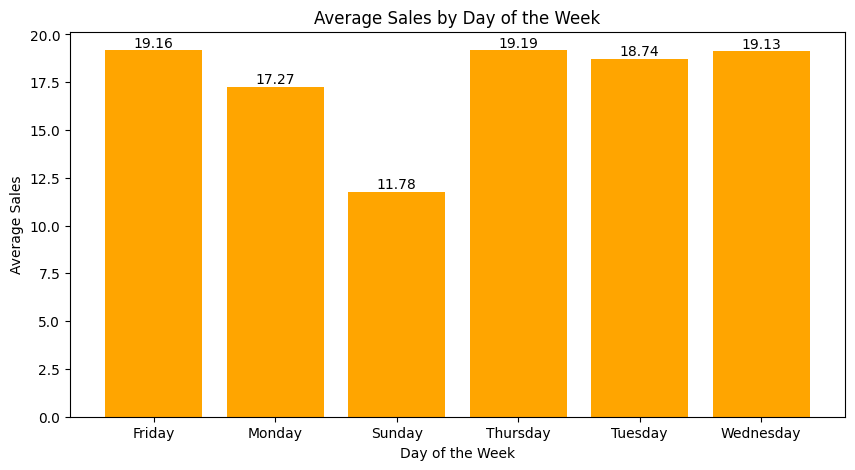

In [ ]:
# Sales by day of the week
sales_by_day = df_cleaned.groupby('Weekday')['Total_Sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
bars = plt.bar(sales_by_day['Weekday'], sales_by_day['Total_Sales'], color='orange')

# Annotate each bar with the corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.show()


**Key Findings:**

**Highest Average Sales on Thursday and Wednesday:**

- Thursday has the highest average sales at 19.19 (in GBP), closely followed by Friday at 19.16. This indicates that mid-week, particularly on these two days, sees the most consistent sales activity.

**Strong Sales on Wednesday:**

- Wednesday also performs well with an average sales figure of 19.13 (in GBP). This suggests that consumer activity remains strong in Midweek.

**Consistent Sales on Tuesday:**

- Tuesday shows relatively strong sales as well, with an average of 18.74 (in GBP), indicating that this day also sees consistent consumer purchases.

**Lower Sales on Monday:**

- Monday has slightly lower average sales at 17.27 (in GBP), which may indicate a slower start to the week as consumers gradually increase their purchasing activity.

**Significantly Lower Sales on Sunday:**

- Sunday has the lowest average sales, at 11.78 (in GBP), suggesting that consumer activity is minimal on this day, likely due to typical weekend behavior where shopping is deprioritized.

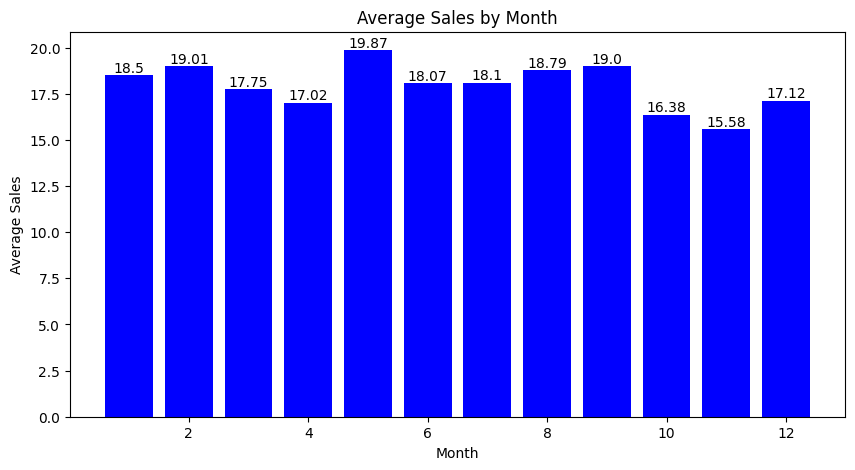

In [ ]:
# Sales by month
sales_by_month_avg = df_cleaned.groupby('Month')['Total_Sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
bars = plt.bar(sales_by_month_avg['Month'], sales_by_month_avg['Total_Sales'], color='blue')

# Annotate each bar with the corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

**Key Findings:**

**Highest Average Sales in May:**

- May (Month 5) has the highest average sales, with an average of 19.87 (in GBP). This indicates that May is the strongest month in terms of consistent daily sales performance.

**Strong Sales Performance in February, August, and September:**

- February (Month 2), August (Month 8), and September (Month 9) also show strong average sales, with figures around 19.01, 18.79 and 19.0 (in GBP), respectively. These months are similarly high-performing, indicating stable consumer activity.

**Lower Sales in October and November:**

- October (Month 10) and November (Month 11) show lower average sales, with 16.38 and 15.58 (in GBP), respectively. This decline may indicate a pre-holiday lull before consumer activity picks up in December.

**Sales Recovery in December:**

- December (Month 12) sees an increase in average sales to 17.12 (in GBP), suggesting a recovery in consumer activity as the holiday season approaches.

**Moderate Sales in Other Months:**

- The other months, including January (Month 1), April (Month 4), June (Month 6), and July (Month 7), show moderate average sales ranging from 17.02 to 18.5 (in GBP). These months represent stable but less dynamic periods in the sales cycle.

# Seasonal Variations

**Comparing Sales Data Across Different Months and Quarters**

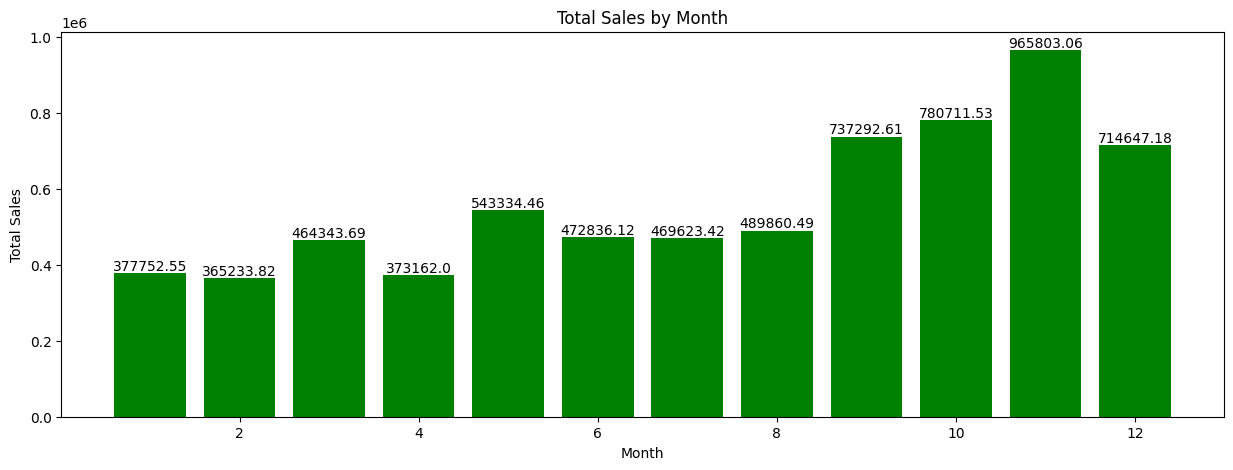

In [ ]:
# Load the feature-engineered dataset
feature_engineered_data_path = '/content/gdrive/My Drive/Colab Notebooks/Sales Trends Analysis Project/feature_engineered_dataset.csv'
df_cleaned = pd.read_csv(feature_engineered_data_path)


# Compare sales by month
monthly_sales = df_cleaned.groupby('Month')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(15, 5))
bars = plt.bar(monthly_sales['Month'], monthly_sales['Total_Sales'], color='green')

# Annotate each bar with the corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


**Key Findings:**

**Peak Sales in November:**

- November (Month 11) has the highest total sales, reaching approximately £965,803.06. This peak is likely driven by holiday shopping events such as Black Friday, which significantly boosts consumer spending.

**Strong Sales in October and December:**

- October (Month 10) and December (Month 12) also show strong sales, with totals of £780,711.53 and £714,647.18 respectively. This indicates a sustained increase in consumer activity leading up to and during the holiday season.

**Mid-Year Growth:**

- Sales begin to pick up noticeably in September (Month 9), with total sales of £737,292.61, marking the start of the high-sales period in the latter part of the year.

**Lower Sales in Early Months:**

- The first few months of the year (January to April) have the lowest total sales, with February (Month 2) recording the lowest at £365,233.82. This suggests a slow start to the year, possibly due to post-holiday spending fatigue.

**Moderate Sales in the Middle of the Year:**

- The months of May through August show moderate sales, with figures ranging between £469,623.42 and £543,334.46. These months represent a stable but less dynamic sales period.


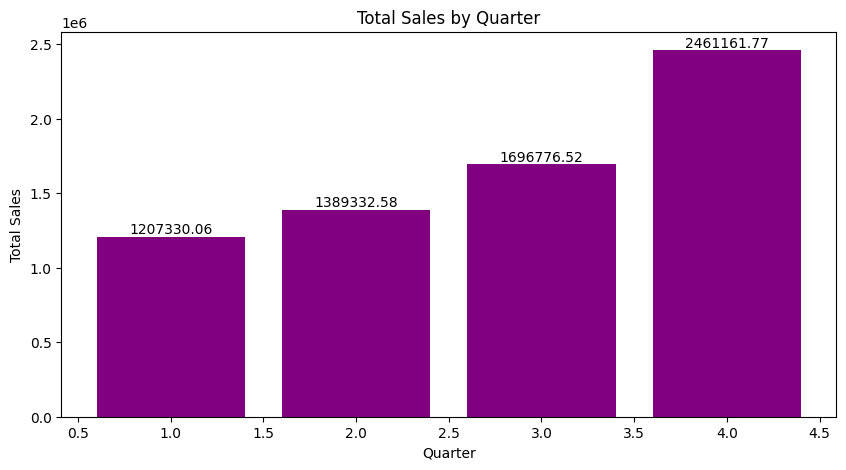

In [ ]:
# Compare sales by quarter
quarterly_sales = df_cleaned.groupby('Quarter')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
bars = plt.bar(quarterly_sales['Quarter'], quarterly_sales['Total_Sales'], color='purple')

# Annotate each bar with the corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Total Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

**Key Findings**

**Significant Growth in Q4:**

- The fourth quarter (Q4) shows the highest total sales, with £2,461,161.77. This substantial increase is likely driven by holiday-related shopping, including events like Black Friday, Cyber Monday, and the Christmas season, which typically see a surge in consumer spending.

**Progressive Sales Increase Across Quarters:**

There is a clear upward trend in total sales from Q1 to Q4:

Q1: £1,207,330.06

Q2: £1,389,332.58

Q3: £1,696,776.52

Q4: £2,461,161.77

This progression indicates consistent sales growth throughout the year, culminating in a significant peak during the final quarter.

**Moderate Growth in Q2 and Q3**:

- Both Q2 and Q3 exhibit moderate growth, with Q3 showing a noticeable increase over Q2. This suggests a building momentum leading into the final quarter.

**Slower Start in Q1:**

- Q1 has the lowest total sales of the year at £1,207,330.06. This slow start could be attributed to the post-holiday sales slump typically seen in the early months of the year.

# Sales by Season

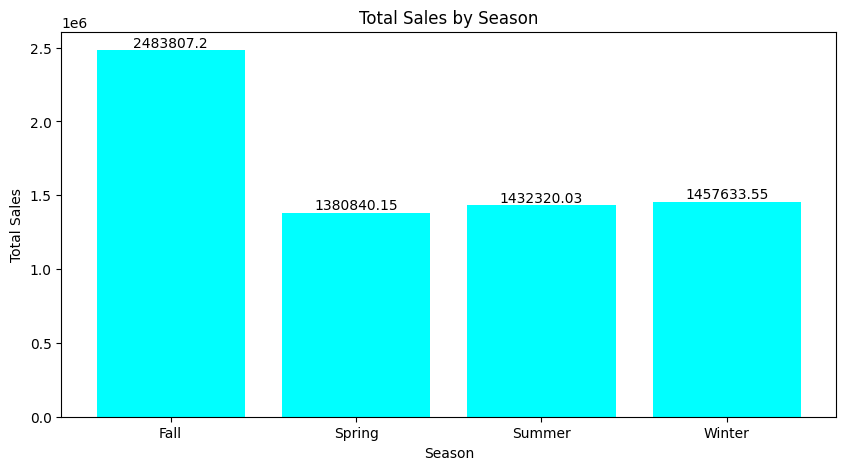

In [ ]:
# Creating a season column based on month
df_cleaned['Season'] = df_cleaned['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))

# Sales by season
seasonal_sales = df_cleaned.groupby('Season')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))
bars = plt.bar(seasonal_sales['Season'], seasonal_sales['Total_Sales'], color='cyan')

# Annotate each bar with the corresponding value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()



**Key Findings**

**Peak Sales in Fall:**

- Fall season shows the highest total sales, reaching £2,483,807.20. This significant peak is likely due to major shopping events such as Black Friday and the start of the holiday shopping season, which occur during this period.

**Lower Sales in Spring:**

- Spring has the lowest total sales, with £1,380,840.15. This suggests a seasonal lull in consumer activity, possibly due to fewer major shopping events or a focus on non-retail activities during this time.

**Moderate Sales in Summer and Winter:**

- Summer and Winter have relatively similar total sales, with £1,432,320.03 and £1,457,633.55 respectively. This indicates steady consumer activity during these seasons, although not as pronounced as in the Fall.

**Consistent Sales in Winter:**

- Despite not reaching the highs of Fall, Winter still shows solid sales, likely bolstered by post-Christmas spending and end-of-year promotions.

In [ ]:
# Load the saved dataset
updated_data_path = '/content/gdrive/My Drive/Colab Notebooks/Sales Trends Analysis Project/updated_sales_dataset_with_features.csv'
df_updated = pd.read_csv(updated_data_path)

# Display the first few rows to verify the dataset
df_updated.head()


,Invoice_Id,StockCode,Description,Quantity,Invoice_date,Price,Customer_Id,Country,Year,Month,...,Week,Season,Is_Christmas_Season,Lag_1,Lag_7,Lag_30,Rolling_Mean_7,Rolling_Mean_30,Rolling_Sum_7,Rolling_Sum_30
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,...,48,Winter,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,48,Winter,0,15.30,NaN,NaN,NaN,NaN,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,...,48,Winter,0,20.34,NaN,NaN,NaN,NaN,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,48,Winter,0,22.00,NaN,NaN,NaN,NaN,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,48,Winter,0,20.34,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display the first few rows
print(df_updated.head())

   Invoice_Id StockCode                          Description  Quantity  \
0      536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365     71053                  WHITE METAL LANTERN         6   
2      536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          Invoice_date  Price  Customer_Id         Country  Year  Month  ...  \
0  2010-12-01 08:26:00   2.55      17850.0  United Kingdom  2010     12  ...   
1  2010-12-01 08:26:00   3.39      17850.0  United Kingdom  2010     12  ...   
2  2010-12-01 08:26:00   2.75      17850.0  United Kingdom  2010     12  ...   
3  2010-12-01 08:26:00   3.39      17850.0  United Kingdom  2010     12  ...   
4  2010-12-01 08:26:00   3.39      17850.0  United Kingdom  2010     12  ...   

   Week  Season  Is_Christmas_Season  Lag_1  Lag_7  Lag_30  Rolling_Mean_7

In [ ]:
# Check the columns and data types
print(df_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383418 entries, 0 to 383417
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Invoice_Id           383418 non-null  int64  
 1   StockCode            383418 non-null  object 
 2   Description          383418 non-null  object 
 3   Quantity             383418 non-null  int64  
 4   Invoice_date         383418 non-null  object 
 5   Price                383418 non-null  float64
 6   Customer_Id          383418 non-null  float64
 7   Country              383418 non-null  object 
 8   Year                 383418 non-null  int64  
 9   Month                383418 non-null  int64  
 10  Day                  383418 non-null  int64  
 11  DayOfWeek            383418 non-null  int64  
 12  Hour                 383418 non-null  int64  
 13  Weekday              383418 non-null  object 
 14  Quarter              383418 non-null  int64  
 15  Total_Sales      

In [ ]:
# Summary statistics for numerical features
df_updated.describe()

,Invoice_Id,Quantity,Price,Customer_Id,Year,Month,Day,DayOfWeek,Hour,Quarter,Total_Sales,Week,Is_Christmas_Season,Lag_1,Lag_7,Lag_30,Rolling_Mean_7,Rolling_Mean_30,Rolling_Sum_7,Rolling_Sum_30
count,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383418.000000,383417.000000,383411.000000,383388.000000,383412.000000,383389.000000,383412.000000,383389.000000
mean,560615.564551,9.856887,2.699428,15297.678677,2010.934581,7.608894,15.046404,2.613224,12.729773,2.854929,17.616807,30.949569,0.004460,17.616814,17.616840,17.616249,17.616818,17.616450,123.317723,528.493503
std,13093.509940,14.009346,2.466849,1709.355295,0.247265,3.414529,8.655023,1.929133,2.271085,1.121126,29.063297,14.748090,0.066633,29.063335,29.063557,29.062516,20.418237,15.086433,142.927656,452.592985
min,536365.000000,1.000000,0.001000,12347.000000,2010.000000,1.000000,1.000000,0.000000,6.000000,1.000000,0.001000,1.000000,0.000000,0.001000,0.001000,0.001000,0.331429,0.982000,2.320000,29.460000
25%,549241.000000,2.000000,1.250000,13969.500000,2011.000000,5.000000,7.000000,1.000000,11.000000,2.000000,4.680000,19.000000,0.000000,4.680000,4.680000,4.680000,6.214286,8.127667,43.500000,243.830000
50%,561889.000000,6.000000,1.950000,15159.000000,2011.000000,8.000000,15.000000,2.000000,13.000000,3.000000,11.600000,34.000000,0.000000,11.600000,11.600000,11.600000,13.868571,15.217667,97.080000,456.530000
75%,572074.000000,12.000000,3.750000,16795.000000,2011.000000,11.000000,22.000000,4.000000,14.000000,4.000000,18.750000,44.000000,0.000000,18.750000,18.750000,18.750000,20.100000,21.432333,140.700000,642.970000
max,581587.000000,117.000000,14.550000,18287.000000,2011.000000,12.000000,31.000000,6.000000,20.000000,4.000000,1226.400000,51.000000,1.000000,1226.400000,1226.400000,1226.400000,512.922857,229.061333,3590.460000,6871.840000


In [ ]:
# Summary statistics for categorical features
df_updated.describe(include=['object'])

,StockCode,Description,Invoice_date,Country,Weekday,Season
count,383418,383418,383418,383418,383418,383418
unique,3615,3819,16764,37,6,4
top,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-11-14 15:27:00,United Kingdom,Thursday,Fall
freq,1986,1979,525,343011,77012,148441


# Distribution of Numerical Features

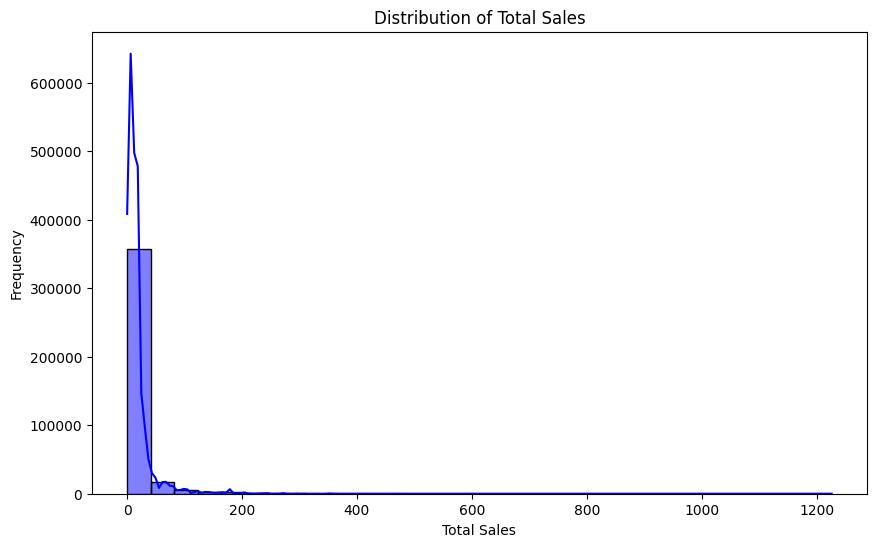

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Total Sales
plt.figure(figsize=(10, 6))
sns.histplot(df_updated['Total_Sales'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

**Key Findings:**

**Highly Skewed Distribution:**

- The distribution of total sales is highly right-skewed, with the majority of transactions concentrated at lower total sales values. Most sales are clustered near zero, with a sharp decline as total sales increase.

**Dominance of Low-Value Sales:**

- The highest frequency of sales occurs at very low total sales amounts, indicating that most transactions involve relatively small purchases.

**Rare High-Value Sales:**

- As the total sales value increases, the frequency drops dramatically. There are very few transactions with high total sales amounts, and these outliers extend far to the right, up to around £1,200. These represent occasional high-value purchases that are not common.

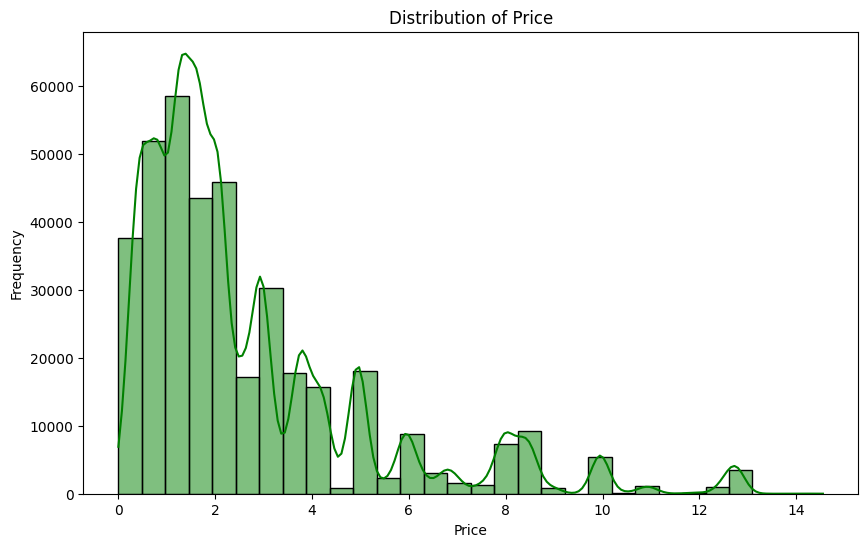

In [ ]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df_updated['Price'], kde=True, bins=30, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Key Findings:**

**Skewed Distribution:**

- The distribution of prices is right-skewed, with a higher frequency of lower-priced items. Most of the prices are concentrated between £0 and £3.

**Price Peaks:**

- The highest frequency of prices is around £1 to £2, where a significant number of transactions occur. This suggests that a majority of the products sold are low-priced items.

**Lower Frequency of Higher Prices:**

- As the price increases beyond £3, the frequency of transactions decreases sharply. There are some smaller peaks in the distribution, particularly around £5, £8, and £10, indicating that certain higher-priced items are sold, but in much smaller quantities.

**Rare High-Price Items:**

- Very few items are priced above £10, and these represent a minor portion of the sales. The distribution tapers off significantly as the price increases, showing that high-priced items are rare in the dataset.

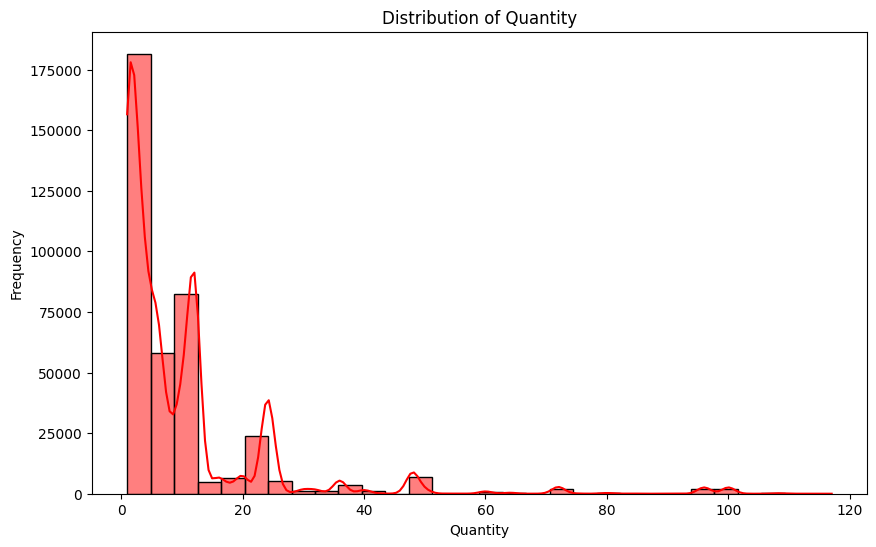

In [ ]:
# Distribution of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df_updated['Quantity'], kde=True, bins=30, color='red')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

**Key Findings:**

**Skewed Distribution:**

- The distribution of quantity is highly right-skewed, with the majority of transactions involving small quantities. Most purchases are concentrated at the lower end, with a significant peak at a quantity of 1 to 5.


**High Frequency of Small Purchases:**

- The highest frequency of transactions occurs at a quantity of 1, indicating that most customers are buying individual items or small quantities.


**Multiple Smaller Peaks:**

- There are smaller peaks around quantities of 10, 20, and 40, suggesting that while most transactions involve small quantities, there are occasional bulk purchases, though these are less common.


**Rare Large-Quantity Purchases:**

- Very few transactions involve quantities greater than 50, with a few outliers extending up to around 100-120. These large-quantity purchases are rare and represent a small portion of the overall sales volume.

**Categorical Features Analysis**

**Analyze categorical features like Country, Season, Weekday, and Is_Christmas_Season.**

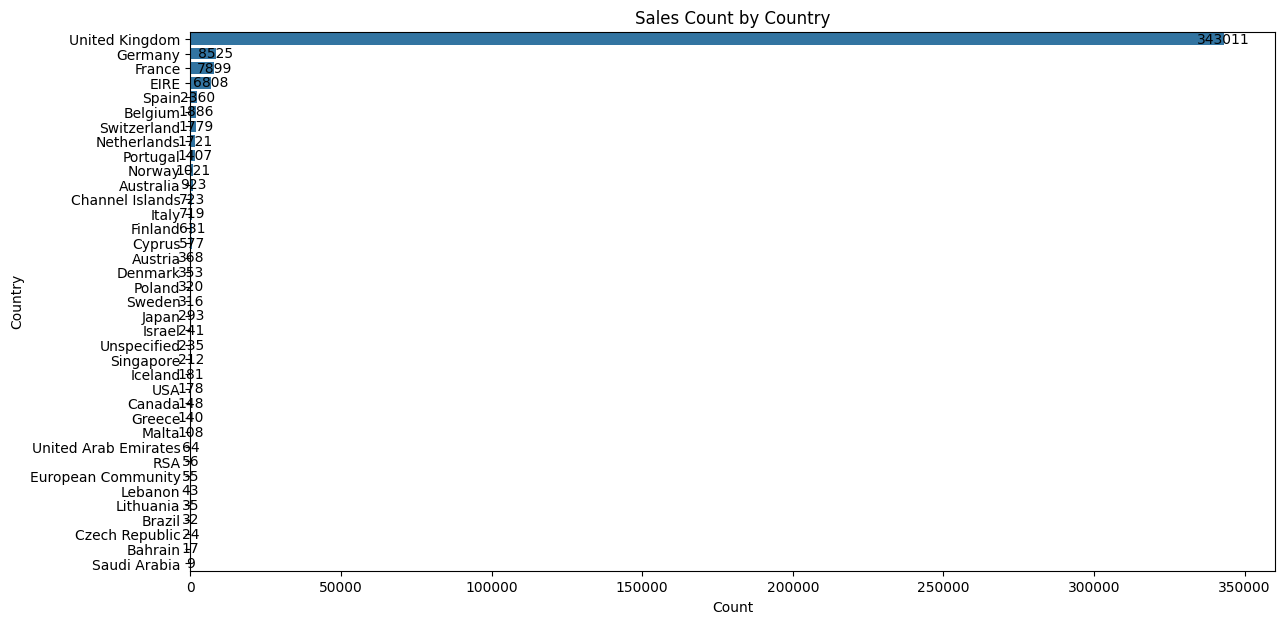

In [ ]:
# Countplot of Sales by Country
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
plt.figure(figsize=(14, 7))
ax = sns.countplot(y='Country', data=df_updated, order=df_updated['Country'].value_counts().index)

# Annotate each bar with its value
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.2, p.get_y() + p.get_height()/2, '{:1.0f}'.format(width), ha='center', va='center')

plt.title('Sales Count by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


**Key Findings**

**Dominant Market in the United Kingdom:**

- The United Kingdom overwhelmingly dominates the sales count, with a total of 343,011 transactions. This suggests that the majority of the business’s sales are concentrated in the UK, making it the most significant market by a large margin.

**Secondary Markets:**

- Germany (7,525), France (7,099), and EIRE (6,008) follow as distant secondary markets. These countries have a much lower sales count compared to the UK but are still important markets for the business.

**Low Sales in Other Countries:**

- Most other countries have very low sales counts, with many below 1,000 transactions. These include countries like Spain (2,608), Belgium (2,386), and Switzerland (1,779). The presence in these markets is minimal compared to the UK.

**Marginal Markets:**

- Some countries, like Saudi Arabia (9), Brazil (32), and Czech Republic (24), have almost negligible sales. These markets represent only a tiny fraction of the overall sales and may not be strategically important at this time.

**Percentage Distribution by Country**

In [ ]:
country_sales = df_updated.groupby('Country')['Total_Sales'].sum().reset_index()
country_sales['Percentage'] = 100 * country_sales['Total_Sales'] / country_sales['Total_Sales'].sum()


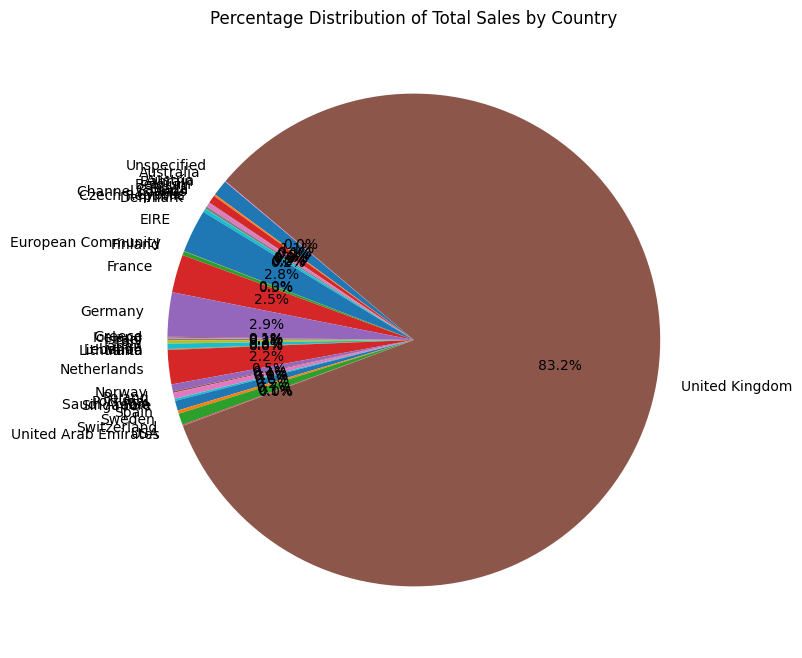

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.pie(country_sales['Total_Sales'], labels=country_sales['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Total Sales by Country')
plt.show()


**Key Findings:**

**Dominance of the United Kingdom:**

- The United Kingdom accounts for an overwhelming 83.2% of the total sales. This clearly indicates that the vast majority of the business's revenue is generated within the UK, making it the most crucial market by far.

**Minor Contribution from Other Countries:**

- Germany (2.9%), France (2.8%), and EIRE (2.5%) contribute to a small portion of total sales, but these markets are still the next most significant after the UK.

**Negligible Contribution from Most Countries:**

- The remaining countries each contribute less than 1% to total sales, highlighting their minimal impact on the overall revenue. These countries include Spain, Belgium, Switzerland, and many others.

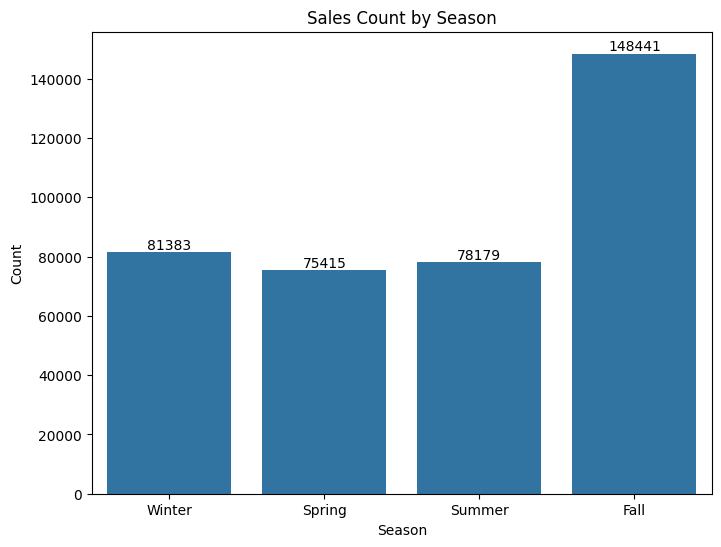

In [ ]:
# Countplot of Sales by Season
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Season', data=df_updated)

# Annotate each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Sales Count by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()



**Key Findings:**

**Highest Sales in Fall:**

- Fall season has the highest sales count, with 148,441 transactions. This indicates a significant increase in consumer activity during the fall, likely driven by events such as back-to-school shopping, Black Friday, and the lead-up to the holiday season.

**Moderate Sales in Winter:**

- Winter shows a relatively strong sales count of 81,383. This reflects continued consumer activity during the holiday season and possibly post-holiday sales.

**Lower Sales in Spring and Summer:**

- Spring and Summer have lower sales counts, with 75,415 and 78,179 transactions, respectively. These seasons appear to be quieter periods for sales, potentially due to fewer major shopping events.

**Spring as the Lowest Season:**

- Among all seasons, Spring has the lowest sales count. This may indicate that consumer spending is at its lowest during this time of year, possibly due to a lack of significant retail events or a shift in consumer behavior.

**Percentage Distribution by Season**

In [ ]:
season_sales = df_updated.groupby('Season')['Total_Sales'].sum().reset_index()
season_sales['Percentage'] = 100 * season_sales['Total_Sales'] / season_sales['Total_Sales'].sum()


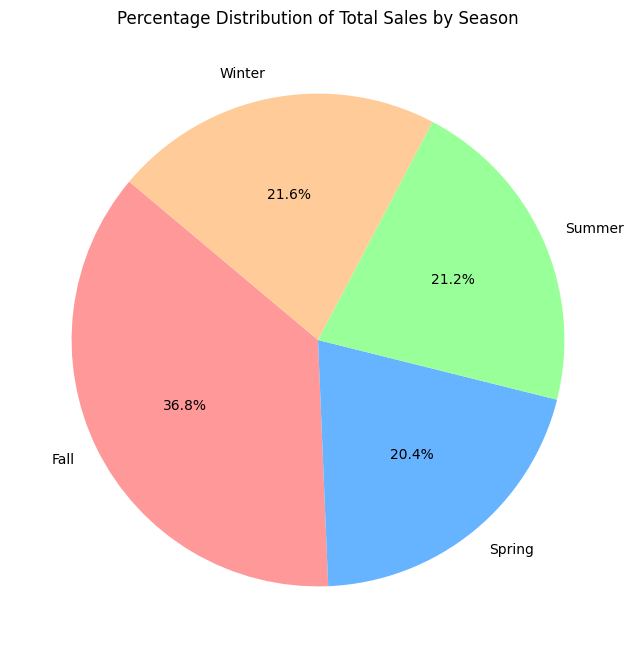

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(season_sales['Total_Sales'], labels=season_sales['Season'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Percentage Distribution of Total Sales by Season')
plt.show()


**Key Findings:**

**Fall as the Dominant Season:**

- Fall accounts for 36.8% of the total sales, making it the most significant season for the business. This indicates a substantial concentration of sales during this period, likely driven by major shopping events like Black Friday, back-to-school, and early holiday shopping.

**Even Distribution Among Other Seasons:**

- The remaining three seasons—Winter, Summer, and Spring—have relatively similar contributions to total sales:

Winter: 21.6%

Summer: 21.2%

Spring: 20.4%

- This suggests that while Fall is the peak sales season, consumer activity is fairly consistent across the other three seasons.

**Lowest Sales in Spring:**

- Spring has the lowest share of total sales at 20.4%, indicating that this is the slowest season for the business. This may be due to fewer major shopping events or different consumer spending patterns during this time.

**Percentage Distribution by Weekday**

In [ ]:
weekday_sales = df_updated.groupby('Weekday')['Total_Sales'].sum().reset_index()
weekday_sales['Percentage'] = 100 * weekday_sales['Total_Sales'] / weekday_sales['Total_Sales'].sum()


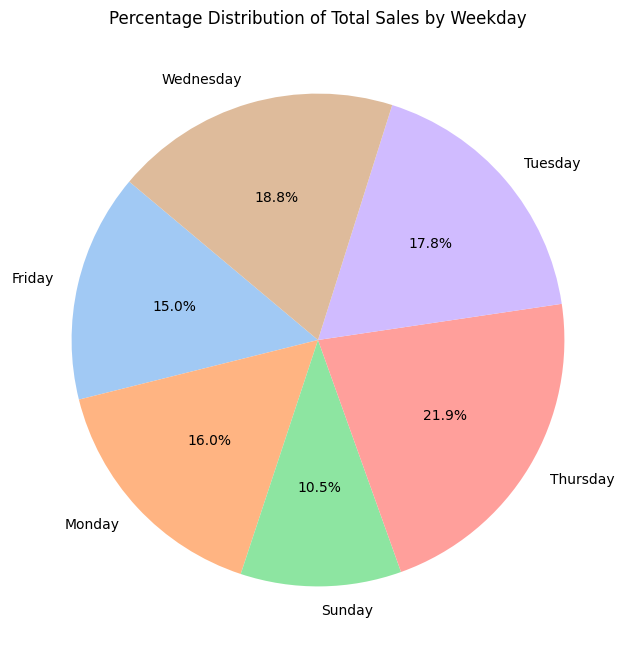

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(weekday_sales['Total_Sales'], labels=weekday_sales['Weekday'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Percentage Distribution of Total Sales by Weekday')
plt.show()


**Key Findings:**

**Highest Sales on Thursday:**

- Thursday accounts for 21.9% of total sales, making it the most significant day of the week for the business. This suggests that consumer activity peaks towards the end of the workweek.

**Strong Sales Mid-Week (Wednesday and Tuesday):**

- Wednesday and Tuesday contribute 18.8% and 17.8% of total sales, respectively. This indicates that the middle of the week is also a strong period for sales, with consistent consumer engagement.

**Lower Sales on Friday and Monday:**

- Friday and Monday have lower sales contributions, at 15.0% and 16.0% respectively. While still significant, these days are less active compared to mid-week and Thursday.

**Minimal Sales on Sunday:**

- Sunday has the lowest percentage of total sales, accounting for just 10.5%. This suggests that Sunday is a relatively quiet day for consumer activity, possibly due to reduced shopping habits on this day.

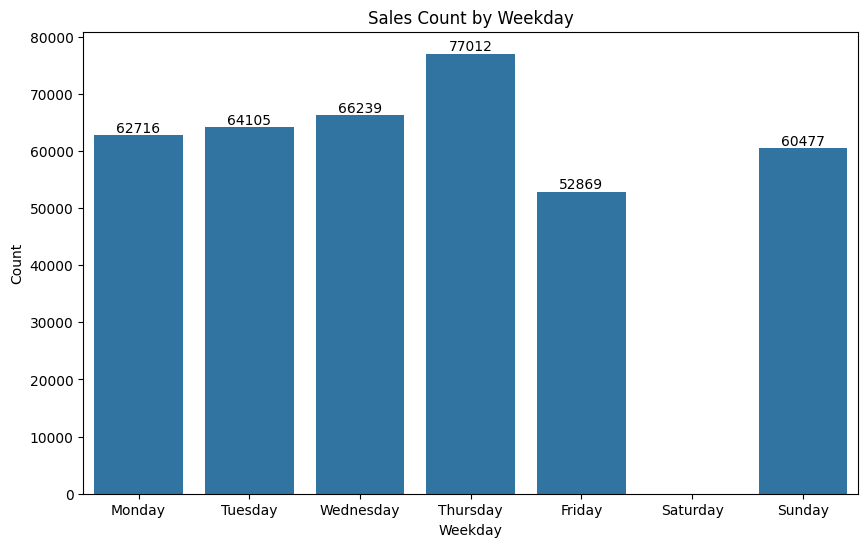

In [ ]:
# Countplot of Sales by Weekday
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Weekday', data=df_updated, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Annotate each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Sales Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()


**Key Findings:**

**Peak Sales on Thursday:**

- Thursday has the highest sales count, with 77,012 transactions. This confirms that Thursday is the most active day for sales, indicating a peak in consumer activity as the week progresses.

**Consistent Sales Mid-Week (Tuesday and Wednesday):**

- Tuesday and Wednesday have relatively strong sales counts of 64,105 and 66,239, respectively. This suggests consistent sales performance during the middle of the week, with consumer engagement remaining strong.

**Lower Sales on Friday:**

- Friday has the lowest sales count of 52,869 among the weekdays. This indicates a drop in consumer activity as the workweek ends, which might be due to consumers preparing for the weekend.

**Relatively High Sales on Sunday:**

- Despite being a weekend day, Sunday has a significant sales count of 60,477, higher than Friday and approaching Monday’s levels. This suggests that Sunday is an important day for consumer activity, likely due to people shopping before the start of a new week.

**Moderate Sales on Monday:**

- Monday’s sales count is 62,716, indicating that it is a moderately active day, slightly less than mid-week but still robust.

**Percentage Distribution by Month**

In [ ]:
month_sales = df_updated.groupby('Month')['Total_Sales'].sum().reset_index()
month_sales['Percentage'] = 100 * month_sales['Total_Sales'] / month_sales['Total_Sales'].sum()


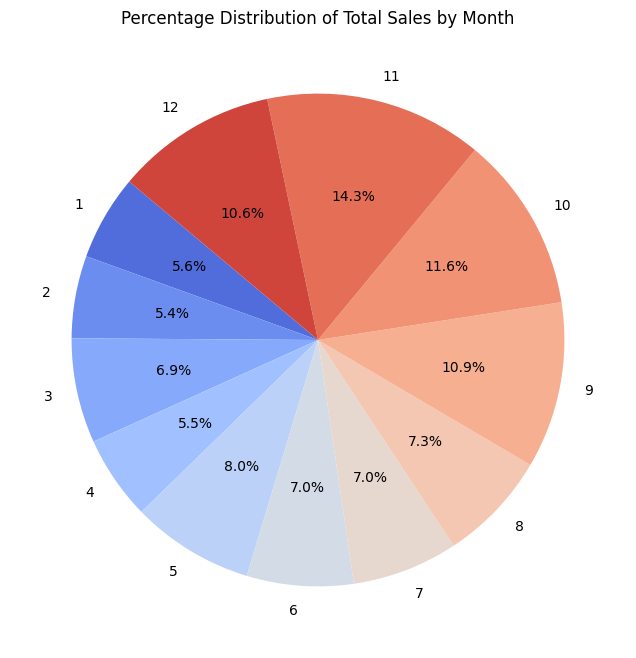

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(month_sales['Total_Sales'], labels=month_sales['Month'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", 12))
plt.title('Percentage Distribution of Total Sales by Month')
plt.show()


**Key Findings:**

**Peak Sales in November (Month 11):**

- November accounts for 14.3% of total sales, making it the most significant month for the business. This is likely due to major shopping events such as Black Friday and the beginning of the holiday shopping season.

**Strong Sales in October (Month 10) and December (Month 12):**

- October and December contribute 11.6% and 10.6% of total sales, respectively. These months are also strong performers, driven by continued holiday shopping and year-end sales events.

**Gradual Increase from August to September:**

- There is a noticeable rise in sales from August (7.3%) to September (10.9%), indicating the build-up towards the peak shopping period in the last quarter of the year.

**Lower Sales in Early Months:**

- The first quarter (January to March) has the lowest percentage of total sales, with January at 5.6%, February at 5.4%, and March at 6.9%. This suggests that consumer spending is relatively low after the holiday season.

**Mid-Year Stability:**

- The months from April to July show stable sales, contributing between 5.5% and 8.0%. These months represent a more balanced period in the sales cycle.

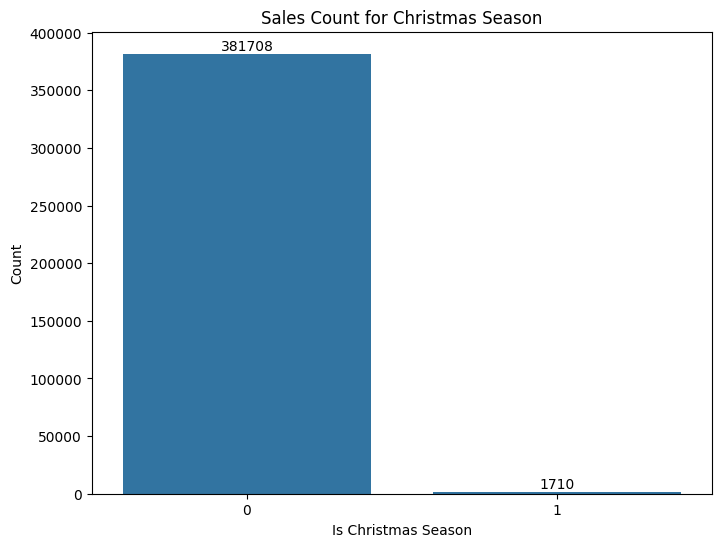

In [ ]:
# Countplot for Christmas Season Sales
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Is_Christmas_Season', data=df_updated)

# Annotate each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Sales Count for Christmas Season')
plt.xlabel('Is Christmas Season')
plt.ylabel('Count')
plt.show()


**Key Findings:**

**Majority of Sales Occur Outside Christmas Season:**

- The overwhelming majority of sales, 381,708 transactions, occur outside the Christmas season. This indicates that most of the business’s revenue is generated during the rest of the year, rather than being heavily dependent on the Christmas season.

**Relatively Few Sales During Christmas Season:**

- Only 1,710 transactions are recorded during the Christmas season. This suggests that while there is some activity during this period, it represents a very small fraction of the total sales.

**Sales Percentage: Christmas Season vs. Overall Sales**

Mounted at /content/gdrive


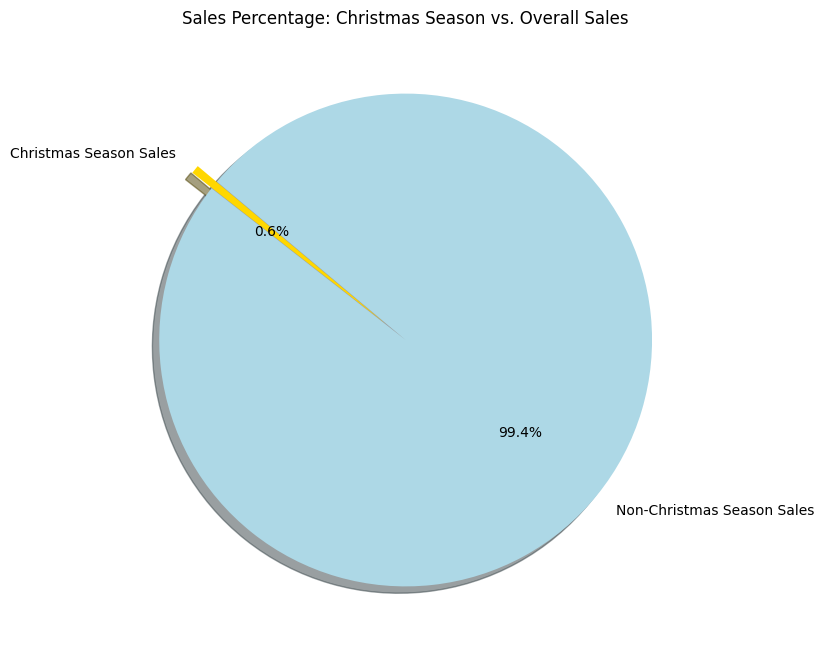

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Load the dataset
updated_data_path = '/content/gdrive/My Drive/Colab Notebooks/Sales Trends Analysis Project/updated_sales_dataset_with_features.csv'
df_updated = pd.read_csv(updated_data_path)

# Calculate total sales during the Christmas season and overall total sales
total_sales_christmas = df_updated[df_updated['Is_Christmas_Season'] == 1]['Total_Sales'].sum()
total_sales_overall = df_updated['Total_Sales'].sum()

# Calculate the percentage of sales during the Christmas season
percentage_christmas_sales = (total_sales_christmas / total_sales_overall) * 100
percentage_non_christmas_sales = 100 - percentage_christmas_sales

# Plotting the sales percentage comparison
labels = ['Christmas Season Sales', 'Non-Christmas Season Sales']
sizes = [percentage_christmas_sales, percentage_non_christmas_sales]
colors = ['gold', 'lightblue']
explode = (0.1, 0)  # explode the 1st slice (Christmas Season)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sales Percentage: Christmas Season vs. Overall Sales')
plt.show()


**Key Findings:**

**Dominance of Non-Christmas Season Sales:**

- 99.4% of total sales occur outside the Christmas season, clearly indicating that the business's revenue is overwhelmingly generated during the non-holiday periods.

**Minimal Contribution from Christmas Season Sales:**

- Sales during the Christmas season contribute only 0.6% to the total sales. This very small percentage suggests that the Christmas season has a negligible impact on overall business performance.

In [ ]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Load the saved dataset
updated_data_path = '/content/gdrive/My Drive/Colab Notebooks/Sales Trends Analysis Project/updated_sales_dataset_with_features.csv'
df_updated = pd.read_csv(updated_data_path)

# Display the first few rows to verify the dataset
df_updated.head()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Invoice_Id,StockCode,Description,Quantity,Invoice_date,Price,Customer_Id,Country,Year,Month,...,Week,Season,Is_Christmas_Season,Lag_1,Lag_7,Lag_30,Rolling_Mean_7,Rolling_Mean_30,Rolling_Sum_7,Rolling_Sum_30
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,...,48,Winter,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,48,Winter,0,15.30,NaN,NaN,NaN,NaN,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,...,48,Winter,0,20.34,NaN,NaN,NaN,NaN,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,48,Winter,0,22.00,NaN,NaN,NaN,NaN,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,48,Winter,0,20.34,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, Easter, Day


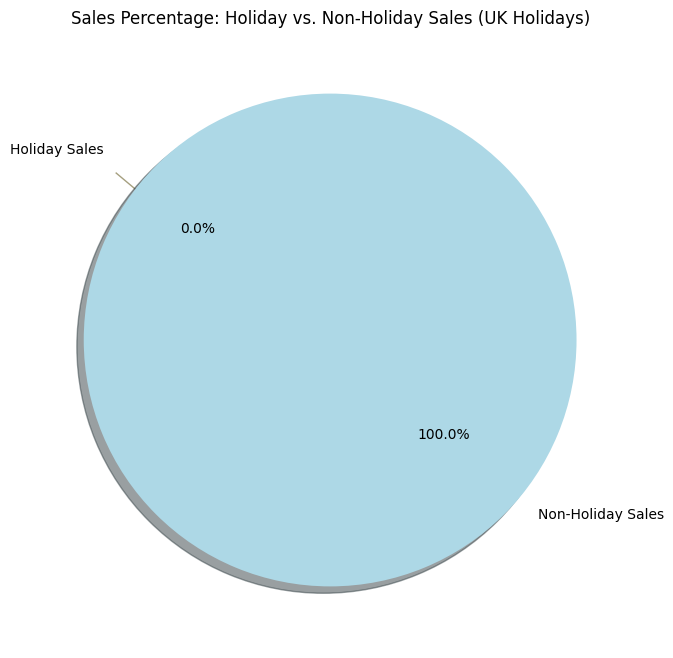

In [ ]:
# Convert Invoice_date to datetime
df_updated['Invoice_date'] = pd.to_datetime(df_updated['Invoice_date'])

# Define UK holidays calendar
class UKHolidayCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year\'s Day', month=1, day=1, observance=nearest_workday),
        Holiday('Good Friday', month=1, day=1, offset=[Easter(), Day(-2)]),
        Holiday('Easter Monday', month=1, day=1, offset=[Easter(), Day(1)]),
        Holiday('Early May Bank Holiday', month=5, day=1, offset=Day(1)),
        Holiday('Spring Bank Holiday', month=5, day=31, offset=Day(-1)),
        Holiday('Summer Bank Holiday', month=8, day=31, offset=Day(-1)),
        Holiday('Christmas Day', month=12, day=25, observance=nearest_workday),
        Holiday('Boxing Day', month=12, day=26, observance=nearest_workday)
    ]

# Create a UK Holiday calendar
uk_holidays = UKHolidayCalendar().holidays(start=df_updated['Invoice_date'].min(), end=df_updated['Invoice_date'].max())

# Create a 'Is_Holiday' column
df_updated['Is_Holiday'] = df_updated['Invoice_date'].isin(uk_holidays).astype(int)

# Calculate total sales during holidays and overall total sales
total_sales_holiday = df_updated[df_updated['Is_Holiday'] == 1]['Total_Sales'].sum()
total_sales_overall = df_updated['Total_Sales'].sum()

# Calculate the percentage of sales during holidays
percentage_holiday_sales = (total_sales_holiday / total_sales_overall) * 100
percentage_non_holiday_sales = 100 - percentage_holiday_sales

# Plotting the sales percentage comparison with Pie Chart
labels = ['Holiday Sales', 'Non-Holiday Sales']
sizes = [percentage_holiday_sales, percentage_non_holiday_sales]
colors = ['gold', 'lightblue']
explode = (0.1, 0)  # explode the 1st slice (Holiday Sales)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sales Percentage: Holiday vs. Non-Holiday Sales (UK Holidays)')
plt.show()


**Key Findings:**

**Minimal Sales During UK Holidays:**

- The pie chart shows that 0.0% of the sales occur during UK holidays, indicating that holiday periods have an almost negligible impact on the business’s sales. Essentially, all sales are happening during non-holiday periods.

**Complete Dependence on Non-Holiday Sales:**

- With 100.0% of sales occurring outside UK holidays, the business's revenue is entirely dependent on non-holiday periods. This suggests that holidays are not a significant driver of consumer spending for this business.

In [ ]:
# Display the first few rows to verify the dataset
df_updated.head()

,Invoice_Id,StockCode,Description,Quantity,Invoice_date,Price,Customer_Id,Country,Year,Month,...,Season,Is_Christmas_Season,Lag_1,Lag_7,Lag_30,Rolling_Mean_7,Rolling_Mean_30,Rolling_Sum_7,Rolling_Sum_30,Is_Holiday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,...,Winter,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,Winter,0,15.30,NaN,NaN,NaN,NaN,NaN,NaN,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,...,Winter,0,20.34,NaN,NaN,NaN,NaN,NaN,NaN,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,Winter,0,22.00,NaN,NaN,NaN,NaN,NaN,NaN,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,...,Winter,0,20.34,NaN,NaN,NaN,NaN,NaN,NaN,0


# Time Series Analysis

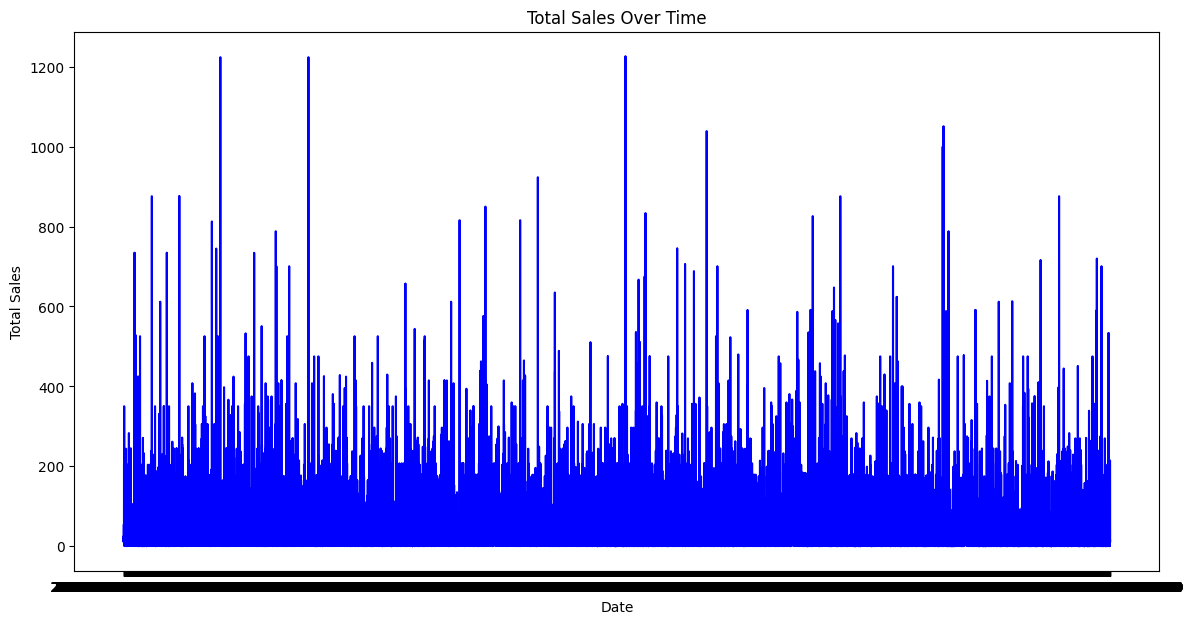

In [ ]:
# Total Sales over time
plt.figure(figsize=(14, 7))
plt.plot(df_updated['Invoice_date'], df_updated['Total_Sales'], color='blue')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

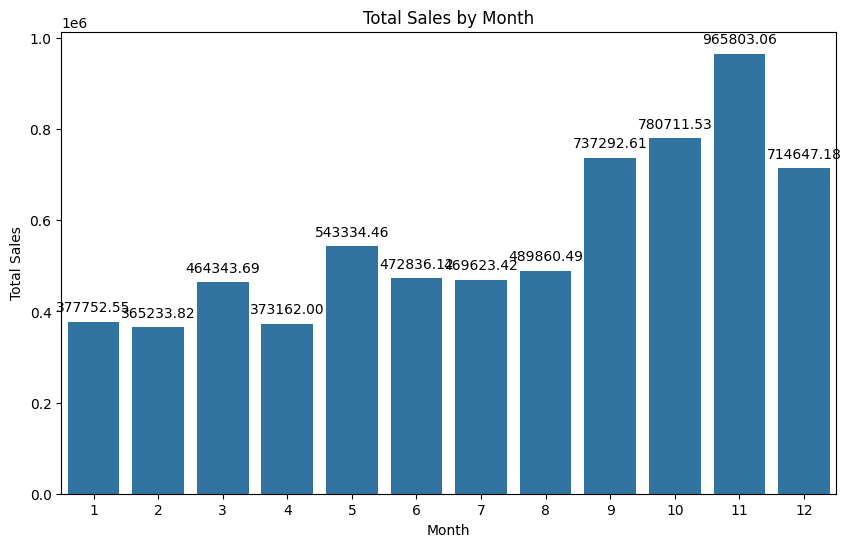

In [ ]:
# Total Sales by Month
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total sales by month
monthly_sales = df_updated.groupby('Month')['Total_Sales'].sum().reset_index()

# Create the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Month', y='Total_Sales', data=monthly_sales)

# Annotate each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


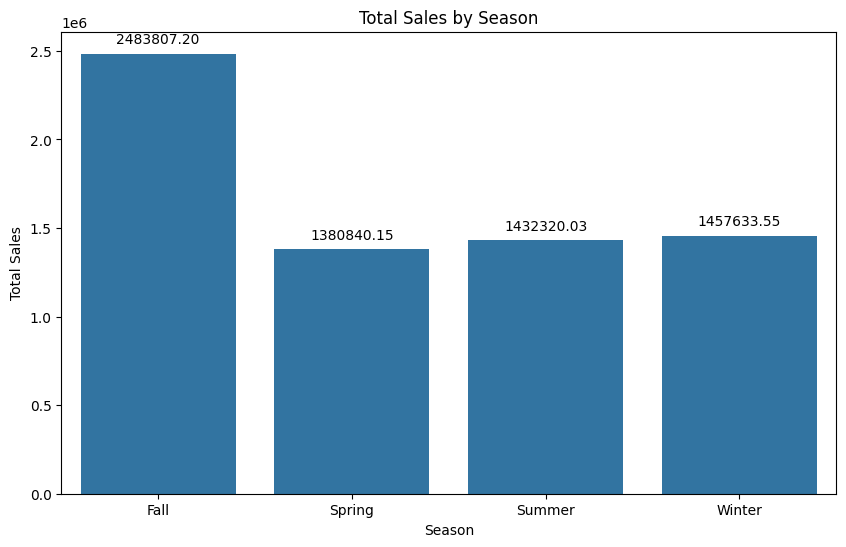

In [ ]:
# Total Sales by Season
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total sales by season
seasonal_sales = df_updated.groupby('Season')['Total_Sales'].sum().reset_index()

# Create the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Season', y='Total_Sales', data=seasonal_sales)

# Annotate each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()


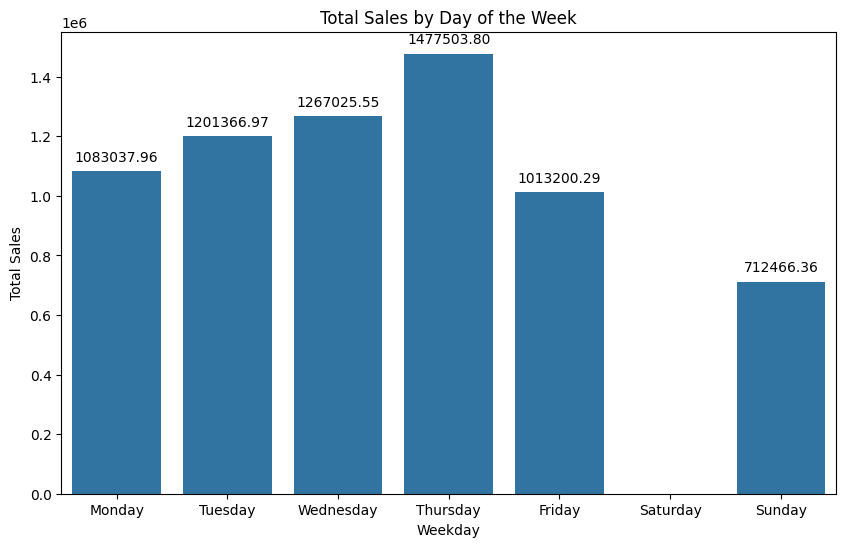

In [ ]:
# Total Sales by Day of the Week
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate total sales by day of the week
weekday_sales = df_updated.groupby('Weekday')['Total_Sales'].sum().reset_index()

# Create the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Weekday', y='Total_Sales', data=weekday_sales, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Annotate each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Total Sales by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.show()


# Correlation Analysis

**Correlation Heatmap for Total_Sales and Quantity**

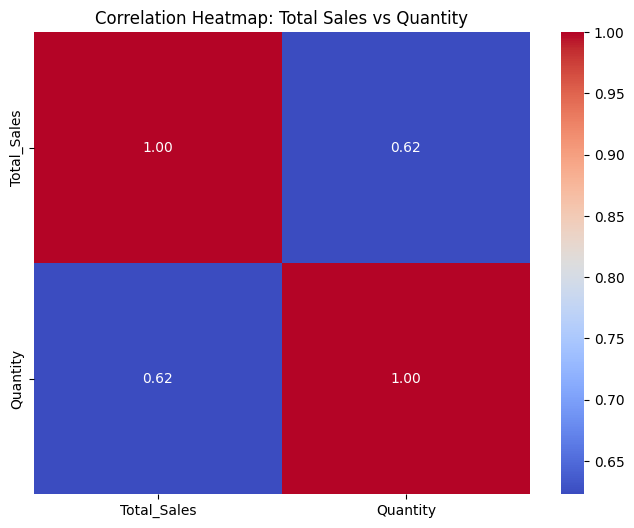

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns
correlation_matrix = df_updated[['Total_Sales', 'Quantity']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Total Sales vs Quantity')
plt.show()


**Key Findings:**

Moderate Positive Correlation Between Total Sales and Quantity:

- The heatmap shows a correlation coefficient of 0.62 between Total_Sales and Quantity.

- This indicates a moderate positive correlation, meaning that as the quantity of items sold increases, the total sales tend to increase as well, but the relationship is not perfectly linear.

- The diagonal values are 1.00, representing the perfect correlation of each variable with itself.

# Correlation Heatmap for Total_Sales vs Time-Related Features

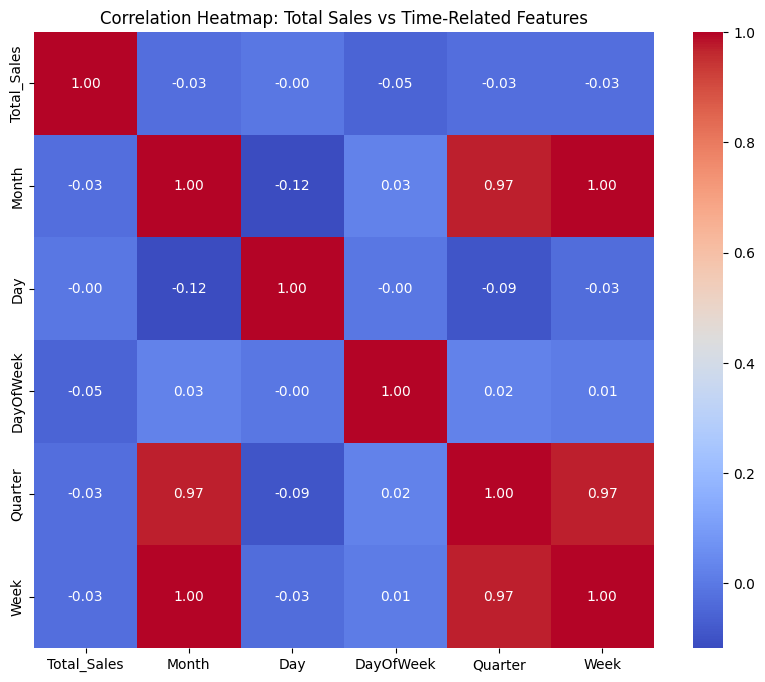

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for correlation
time_related_columns = ['Total_Sales', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'Week']
correlation_matrix = df_updated[time_related_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Total Sales vs Time-Related Features')
plt.show()


**Key Findings:**

**Weak Correlation Between Total Sales and Time-Related Features:**

- The heatmap reveals that Total_Sales has a very weak correlation with all time-related features such as Month, Day, DayOfWeek, Quarter, and Week, with correlation coefficients close to 0. This suggests that there is no strong linear relationship between total sales and these specific time-related factors in this dataset.

**Strong Correlation Among Time-Related Features:**

- There is a strong correlation between Month and Quarter (0.97), as well as between Week and Quarter (0.97). This is expected since these time-related features are inherently related; for example, months are part of quarters, and weeks are distributed across quarters.

**Minimal Impact of Day or Day of Week on Total Sales:**

- The correlations between Total_Sales and Day, DayOfWeek are very weak, indicating that specific days or days of the week do not significantly influence total sales in a predictable linear manner.

# Correlation Heatmap for Price vs Quantity

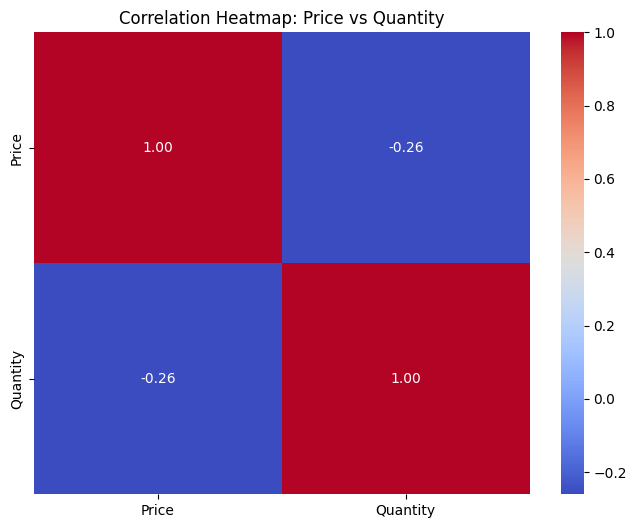

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns
correlation_matrix = df_updated[['Price', 'Quantity']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap: Price vs Quantity')
plt.show()


**Key Findings**

**Weak Negative Correlation Between Price and Quantity:**

- The heatmap shows a correlation coefficient of -0.26 between Price and Quantity. This indicates a weak negative correlation, suggesting that as the price increases, the quantity sold tends to decrease slightly.

- However, this relationship is not strong, meaning price is not the sole determinant of quantity sold.

- The diagonal values are 1.00, representing the perfect correlation of each variable with itself.

- The weak negative correlation suggests some level of price sensitivity among customers. Considering experimenting with price adjustments to see how it impacts sales volume. For example, slight reductions in price might increase quantity sold, but the impact should be tested and analyzed.